In [9]:
! pip install geopandas shapely rasterio Pillow

In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from PIL import Image
from rasterio.plot import show
import random
from pyproj import Proj, transform, Transformer

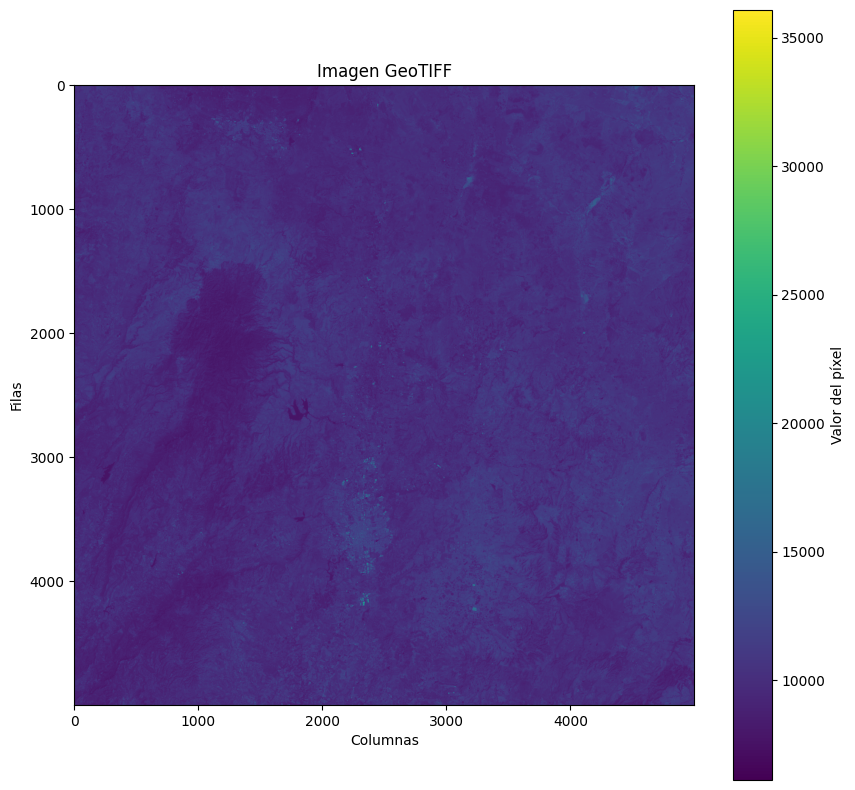

In [11]:
ruta_tiff = "imagen.tif"
with rasterio.open(ruta_tiff) as src:
    srs_raster = src.crs.to_proj4()
with rasterio.open(ruta_tiff) as src:
    # Lee la banda 1 del GeoTIFF
    img = src.read(1)

    # Utiliza imshow para mostrar la imagen
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='viridis')

    # Muestra el título y los ejes
    plt.title('Imagen GeoTIFF')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')

    # Muestra el colorbar
    cbar = plt.colorbar(label='Valor del píxel')

    # Muestra la trama
    plt.show()


In [12]:
ruta_csv = "denue.csv"
try:
    df = pd.read_csv(ruta_csv, encoding='utf-8')
except UnicodeDecodeError:
    # If 'utf-8' fails, try 'latin1' encoding
    df = pd.read_csv(ruta_csv, encoding='latin1')
df.head(3)

<ipython-input-12-4b85f5565dbb>:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv, encoding='latin1')


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,6862345,01001115119000031001000000U2,AGROPECUARIA CHARCOS DE QUEZADA,AGROPECUARIA CHARCOS DE QUEZADA SOCIEDAD DE PR...,115119,Otros servicios relacionados con la agricultura,6 a 10 personas,AVENIDA,UNIVERSIDAD,CALLE,...,Aguascalientes,0233,9,4492853716,NaN,NaN,Fijo,21.906992,-102.309807,2019-04
1,6905212,01001115119000041000000000U1,AGROPECUARIO LOS ALAMITOS,NaN,115119,Otros servicios relacionados con la agricultura,0 a 5 personas,CALLE,J. ENCARNACION PAYEN,CALLE,...,Aguascalientes,0322,18,4499960472,NaN,NaN,Fijo,21.889926,-102.314009,2019-11
2,6166248,01007112512000012001000000U8,CENTRO ACUÍCOLA PABELLON DE HIDALGO,SAGARPA,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CALLE,NINGUNO,CALLE,...,SEMARNAT [Centro Acuícola],0078,800,NaN,NaN,WWW.GOB.MX,Fijo,22.167778,-102.345556,2010-07


In [13]:
# Selecciona las columnas deseadas
df_limpio = df[["codigo_act", "per_ocu", "latitud", "longitud"]].copy()
df_limpio["codigo_act"] =  df_limpio['codigo_act'].astype(str).str[:2]
# Muestra el nuevo DataFrame
print(df_limpio)

      codigo_act           per_ocu    latitud    longitud
0             11   6 a 10 personas  21.906992 -102.309807
1             11    0 a 5 personas  21.889926 -102.314009
2             11    0 a 5 personas  22.167778 -102.345556
3             11   6 a 10 personas  21.956298 -101.997312
4             11    0 a 5 personas  21.837255 -102.710931
...          ...               ...        ...         ...
61641         93  11 a 30 personas  21.875367 -102.279581
61642         93  11 a 30 personas  21.865938 -102.289821
61643         93    0 a 5 personas  21.919051 -101.959755
61644         93  11 a 30 personas  21.893411 -102.323357
61645         93  11 a 30 personas  21.875196 -102.281411

[61646 rows x 4 columns]


In [15]:
data2 = pd.read_excel("SCIAN_2023124_141359987.xlsx",skiprows=4, index_col=0)

# Filtra las filas donde en la primera columna hay un código de 2 dígitos, solo codigos de sectores
data2 = data2[data2.index.astype(str).str.len() == 2]

new_records = pd.DataFrame({
    "Título": ["Industrias manufactureras","Industrias manufactureras","Industrias manufactureras", "Transportes, correos y almacenamiento","Transportes, correos y almacenamiento"] ,
    "Descripción": ["","" ,"" ,"" ,"" ] ,
    "Incluye": ["","" ,"" ,"" ,"" ],
    "Excluye": ["","" ,"" ,"" ,"" ],
    "Índice de bienes y servicios comprendidos en las categorías del SCIAN México 2023": ["","" ,"" ,"" ,"" ]
}, index=[str(code) for code in [31, 32, 33, 48, 49]])

data2 = pd.concat([data2, new_records])


In [16]:
df_limpio = pd.merge(df_limpio, data2[['Título']], left_on='codigo_act', right_index=True, how='left')

# Muestra el nuevo DataFrame
df_limpio.head()


,codigo_act,per_ocu,latitud,longitud,Título
0,11,6 a 10 personas,21.906992,-102.309807,"Agricultura, cría y explotación de animales, a..."
1,11,0 a 5 personas,21.889926,-102.314009,"Agricultura, cría y explotación de animales, a..."
2,11,0 a 5 personas,22.167778,-102.345556,"Agricultura, cría y explotación de animales, a..."
3,11,6 a 10 personas,21.956298,-101.997312,"Agricultura, cría y explotación de animales, a..."
4,11,0 a 5 personas,21.837255,-102.710931,"Agricultura, cría y explotación de animales, a..."


In [17]:
df_limpio['per_ocu'] = df_limpio['per_ocu'].astype(str).str.extract('(\d+)').astype(float)
# Verifica si hay valores nulos en el DataFrame
valores_nulos = df_limpio.isnull().sum()

# Muestra la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(valores_nulos)

# Muestra el tipo de dato por columna
tipos_de_dato = df_limpio.dtypes

# Muestra el tipo de dato por columna
print("\nTipo de dato por columna:")
print(tipos_de_dato)

Valores nulos por columna:
codigo_act    0
per_ocu       0
latitud       0
longitud      0
Título        0
dtype: int64

Tipo de dato por columna:
codigo_act     object
per_ocu       float64
latitud       float64
longitud      float64
Título         object
dtype: object


In [18]:
# Crea una columna 'geometry' utilizando las columnas de latitud y longitud
geometry = [Point(xy) for xy in zip(df_limpio['longitud'], df_limpio['latitud'])]
df_limpio['geometry'] = geometry

# Convierte el DataFrame de pandas en un GeoDataFrame de GeoPandas
gdf = gpd.GeoDataFrame(df_limpio, geometry='geometry')


srs_gdf = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
transformador = Transformer.from_proj(Proj(srs_gdf), Proj(srs_raster))
gdf["geometry"] = gdf["geometry"].apply(lambda geom: Point(transformador.transform(geom.x, geom.y)))

# Muestra el GeoDataFrame
gdf

,codigo_act,per_ocu,latitud,longitud,Título,geometry
0,11,6.0,21.906992,-102.309807,"Agricultura, cría y explotación de animales, a...",POINT (2468147.992 1094190.873)
1,11,0.0,21.889926,-102.314009,"Agricultura, cría y explotación de animales, a...",POINT (2467711.796 1092292.619)
2,11,0.0,22.167778,-102.345556,"Agricultura, cría y explotación de animales, a...",POINT (2464542.021 1123223.156)
3,11,6.0,21.956298,-101.997312,"Agricultura, cría y explotación de animales, a...",POINT (2500276.264 1099643.835)
4,11,0.0,21.837255,-102.710931,"Agricultura, cría y explotación de animales, a...",POINT (2426869.540 1086576.086)
...,...,...,...,...,...,...
61641,93,11.0,21.875367,-102.279581,"Actividades legislativas, gubernamentales, de ...",POINT (2471248.754 1090665.178)
61642,93,11.0,21.865938,-102.289821,"Actividades legislativas, gubernamentales, de ...",POINT (2470193.605 1089617.948)
61643,93,0.0,21.919051,-101.959755,"Actividades legislativas, gubernamentales, de ...",POINT (2504137.271 1095499.347)
61644,93,11.0,21.893411,-102.323357,"Actividades legislativas, gubernamentales, de ...",POINT (2466751.468 1092682.561)


La tarea principal del modelo es predecir la categoría de actividad (codigo_act) en función de dos tipos de datos: la información de la imagen (extraída de un archivo GeoTIFF) y la información de ubicación (latitud y longitud).

In [22]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
'''
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    gdf[['geometry', 'longitud', 'latitud']], gdf['codigo_act'], test_size=0.2, random_state=42
)

# Codificación de etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Preparar datos de imagen
def extract_image_features(row):
    # Aquí debes agregar la lógica para extraer características de la imagen basada en la geometría
    # Por ahora, usaremos valores aleatorios como características de imagen.
    return np.random.rand(10, 10, 1)  # Cambia las dimensiones según tus necesidades

X_train['image_features'] = X_train.apply(extract_image_features, axis=1)
X_test['image_features'] = X_test.apply(extract_image_features, axis=1)

# Crear el modelo de Deep Learning
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(10, 10, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(np.stack(X_train['image_features']), y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(np.stack(X_test['image_features']), y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')'''


Epoch 1/10
1233/1233 [==============================] - 10s 7ms/step - loss: 2.1821 - accuracy: 0.3685 - val_loss: 2.1495 - val_accuracy: 0.3762
Epoch 2/10
1233/1233 [==============================] - 5s 4ms/step - loss: 2.1687 - accuracy: 0.3694 - val_loss: 2.1757 - val_accuracy: 0.3762
Epoch 3/10
1233/1233 [==============================] - 6s 5ms/step - loss: 2.1639 - accuracy: 0.3694 - val_loss: 2.1496 - val_accuracy: 0.3762
Epoch 4/10
1233/1233 [==============================] - 6s 5ms/step - loss: 2.1609 - accuracy: 0.3694 - val_loss: 2.1510 - val_accuracy: 0.3762
Epoch 5/10
1233/1233 [==============================] - 5s 4ms/step - loss: 2.1558 - accuracy: 0.3694 - val_loss: 2.1543 - val_accuracy: 0.3762
Epoch 6/10
1233/1233 [==============================] - 6s 5ms/step - loss: 2.1503 - accuracy: 0.3694 - val_loss: 2.1569 - val_accuracy: 0.3762
Epoch 7/10
1233/1233 [==============================] - 5s 4ms/step - loss: 2.1447 - accuracy: 0.3694 - val_loss: 2.1593 - val_accuracy

In [37]:
'''# Simulación de una consulta de usuario
tu_latitud_simulada=  21.9641086
tu_longitud_simulada=  -102.283497
consulta_usuario = pd.DataFrame({
    'latitud': [tu_latitud_simulada],
    'longitud': [tu_longitud_simulada],
})

# Simulación de datos de imagen para la consulta del usuario
imagen_usuario = extract_image_features(consulta_usuario.iloc[0])

# Preparación de datos para el modelo
imagen_usuario = np.expand_dims(imagen_usuario, axis=0)  # Añadir una dimensión para el lote
codigo_act_predicho = model.predict(imagen_usuario)

# Decodificación de la predicción
categoria_predicha = label_encoder.inverse_transform(np.argmax(codigo_act_predicho, axis=1))[0]

# Mostrar la predicción
print(f'Para la ubicación ({tu_latitud_simulada}, {tu_longitud_simulada}), el modelo predice la categoría: {categoria_predicha}')'''


TypeError: ignored

In [36]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import rasterio
from pyproj import Proj, Transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

ruta_tiff = "imagen.tif"
with rasterio.open(ruta_tiff) as src:
    srs_raster = src.crs.to_proj4()
    transformer = Transformer.from_proj(Proj(srs_raster), Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"))

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    gdf[['geometry', 'longitud', 'latitud']], gdf['codigo_act'], test_size=0.2, random_state=42
)

# Codificación de etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def extract_image_features(row, src):
    x, y = transformer.transform(row['longitud'], row['latitud'])
    x, y = int(x), int(y)

    # Tamaño de la región de interés
    size = 10

    # Leer la región de interés de la imagen
    img_patch = src.read(1, window=((y, y + size), (x, x + size)))

    # Calcular estadísticas de píxeles
    mean_pixel_value = np.mean(img_patch)
    std_pixel_value = np.std(img_patch)

    return [mean_pixel_value, std_pixel_value]

# Aplicar la función a tu GeoDataFrame
with rasterio.open(ruta_tiff) as src:
    X_train['image_features'] = X_train.apply(lambda row: extract_image_features(row, src), axis=1)
    X_test['image_features'] = X_test.apply(lambda row: extract_image_features(row, src), axis=1)
def extract_image_features(row, src):
    x, y = transformer.transform(row['longitud'], row['latitud'])
    x, y = int(x), int(y)

    # Tamaño de la región de interés
    size = 10

    # Leer la región de interés de la imagen
    img_patch = src.read(1, window=((y, y + size), (x, x + size)))

    # Calcular estadísticas de píxeles
    mean_pixel_value = np.mean(img_patch)
    std_pixel_value = np.std(img_patch)

    return [mean_pixel_value, std_pixel_value]

# Aplicar la función a tu GeoDataFrame
with rasterio.open(ruta_tiff) as src:
    X_train['image_features'] = X_train.apply(lambda row: extract_image_features(row, src), axis=1)
    X_test['image_features'] = X_test.apply(lambda row: extract_image_features(row, src), axis=1)


# Aplanar las listas en la columna 'image_features'
X_train[['mean_pixel', 'std_pixel']] = pd.DataFrame(X_train['image_features'].tolist(), index=X_train.index)
X_test[['mean_pixel', 'std_pixel']] = pd.DataFrame(X_test['image_features'].tolist(), index=X_test.index)

# Crear el modelo de Deep Learning
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(2,)))  # 2 features: mean_pixel, std_pixel
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train[['mean_pixel', 'std_pixel']], y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test[['mean_pixel', 'std_pixel']], y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
1233/1233 [==============================] - 3s 2ms/step - loss: 101.6309 - accuracy: 0.1844 - val_loss: 50.6051 - val_accuracy: 0.0253
Epoch 2/10
1233/1233 [==============================] - 3s 2ms/step - loss: 43.7402 - accuracy: 0.1865 - val_loss: 51.1644 - val_accuracy: 0.3762
Epoch 3/10
1233/1233 [==============================] - 3s 3ms/step - loss: 38.9768 - accuracy: 0.1894 - val_loss: 28.3134 - val_accuracy: 0.0122
Epoch 4/10
1233/1233 [==============================] - 3s 2ms/step - loss: 37.8065 - accuracy: 0.1878 - val_loss: 42.3478 - val_accuracy: 0.0367
Epoch 5/10
1233/1233 [==============================] - 2s 2ms/step - loss: 33.8691 - accuracy: 0.1920 - val_loss: 30.0066 - val_accuracy: 0.0081
Epoch 6/10
1233/1233 [==============================] - 3s 2ms/step - loss: 31.6764 - accuracy: 0.1898 - val_loss: 21.8799 - val_accuracy: 0.3762
Epoch 7/10
1233/1233 [==============================] - 3s 2ms/step - loss: 28.3689 - accuracy: 0.1901 - val_loss: 19.0563 

In [39]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import rasterio
from pyproj import Proj, Transformer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from ipywidgets import interactive, widgets

# Supongamos que tienes tu modelo entrenado (model), label_encoder, y la ruta al archivo tif (ruta_tiff) definidos.

# Función para extraer características de la imagen
def extract_image_features(latitud, longitud):
    with rasterio.open(ruta_tiff) as src:
        transformer = Transformer.from_proj(Proj(src.crs), Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"))
        x, y = transformer.transform(longitud, latitud)
        x, y = int(x), int(y)

        # Tamaño de la región de interés
        size = 10

        # Leer la región de interés de la imagen
        img_patch = src.read(1, window=((y, y + size), (x, x + size)))

        # Calcular estadísticas de píxeles
        mean_pixel_value = np.mean(img_patch)
        std_pixel_value = np.std(img_patch)

        return [mean_pixel_value, std_pixel_value]

# Función para predecir la categoría y mostrar resultados
def predecir(latitud, longitud):
    imagen_usuario = extract_image_features(latitud, longitud)
    imagen_usuario = np.expand_dims(imagen_usuario, axis=0)  # Añadir una dimensión para el lote
    codigo_act_predicho = model.predict(imagen_usuario)

    # Decodificación de la predicción
    categoria_predicha = label_encoder.inverse_transform(np.argmax(codigo_act_predicho, axis=1))[0]

    # Mostrar resultados
    print(f'Para la ubicación ({latitud}, {longitud}), el modelo predice la categoría: {categoria_predicha}')

# Crear una interfaz de usuario interactiva
latitud_input = widgets.FloatText(value=21.9641086, description='Latitud:')
longitud_input = widgets.FloatText(value=-102.283497, description='Longitud:')

interactive_plot = interactive(predecir, latitud=latitud_input, longitud=longitud_input)
output = interactive_plot.children[-1]
output.layout.height = '200px'
interactive_plot


interactive(children=(FloatText(value=21.9641086, description='Latitud:'), FloatText(value=-102.283497, descri…

In [25]:
import folium

# Crear un mapa centrado en la ubicación predicha
mapa = folium.Map(location=[tu_latitud_simulada, tu_longitud_simulada], zoom_start=12)

# Agregar marcador en la ubicación predicha
folium.Marker([tu_latitud_simulada, tu_longitud_simulada], popup=f'Categoría: {categoria_predicha}').add_to(mapa)

from IPython.display import display
display(mapa)


In [ ]:
# Decodificación de la predicción
categoria_predicha = label_encoder.inverse_transform(np.argmax(codigo_act_predicho, axis=1))[0]

# Obtener el título asociado a la categoría predicha
categoria_predicha = str(categoria_predicha)
titulo_prediccion = data2.loc[categoria_predicha, 'Título']


# Mostrar la predicción
print(f'Para la ubicación ({tu_latitud_simulada}, {tu_longitud_simulada}), el modelo predice la categoría: {categoria_predicha}')


# Crear un mapa centrado en la ubicación predicha
mapa = folium.Map(location=[tu_latitud_simulada, tu_longitud_simulada], zoom_start=12)

# Agregar marcador en la ubicación predicha con título y categoría
popup_texto = f'Título: {titulo_prediccion}<br>Categoría: {categoria_predicha}'
folium.Marker([tu_latitud_simulada, tu_longitud_simulada], popup=popup_texto).add_to(mapa)


Para la ubicación (21.906279500683876, -102.30497801534206), el modelo predice la categoría: 46


In [ ]:
from IPython.display import display
display(mapa)